In [38]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import random
# Import the requests library
import requests

#import the API key
from config import weather_api_key

In [39]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1200)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
print(coordinates)

[(22.4914807737143, 68.67476300877001), (89.72756152546131, 3.5472334069129374), (50.9681625215988, -132.95921795576), (32.27102428528555, -127.55025036753537), (83.2536013900368, 179.79866102001614), (-6.2962536824313275, -174.580236477346), (-62.19238058895125, -176.2570275227713), (9.861118749374825, -34.42252041104649), (-86.86904347213824, -107.19643831610463), (-11.736803899219638, 175.9749592853584), (-9.970206919161598, 171.4911564406964), (-1.8675083761317381, 140.36684235793598), (48.13724329370149, 168.63770486563624), (-88.82917618510643, 12.624154093021303), (15.001643840476305, -6.1516941772310645), (67.25223355093266, 150.47588827991603), (39.670582299115694, -151.33893215186637), (-61.55951894206821, 2.18906229926219), (62.97598924798777, -91.18352198774447), (-12.471487859261813, 177.1797143204534), (86.402540299886, 51.786422813800215), (-72.2010662119241, 151.40495397074153), (4.172868910123682, 136.20173903273462), (-49.31613802340141, -123.16691989092152), (33.9993

In [41]:
# Import the time library and the datetime module from the datetime library

import time
from datetime import datetime

In [42]:
# Display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.4914807737143 68.67476300877001
89.72756152546131 3.5472334069129374
50.9681625215988 -132.95921795576
32.27102428528555 -127.55025036753537
83.2536013900368 179.79866102001614
-6.2962536824313275 -174.580236477346
-62.19238058895125 -176.2570275227713
9.861118749374825 -34.42252041104649
-86.86904347213824 -107.19643831610463
-11.736803899219638 175.9749592853584
-9.970206919161598 171.4911564406964
-1.8675083761317381 140.36684235793598
48.13724329370149 168.63770486563624
-88.82917618510643 12.624154093021303
15.001643840476305 -6.1516941772310645
67.25223355093266 150.47588827991603
39.670582299115694 -151.33893215186637
-61.55951894206821 2.18906229926219
62.97598924798777 -91.18352198774447
-12.471487859261813 177.1797143204534
86.402540299886 51.786422813800215
-72.2010662119241 151.40495397074153
4.172868910123682 136.20173903273462
-49.31613802340141 -123.16691989092152
33.999391339937304 -147.9656955792976
-29.42265236512892 -171.90724687749432
-87.90729871472867 60.832903

In [43]:
# Find the nearest cities for the coordinates

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

okha in
barentsburg sj
prince rupert ca
pacific grove us
leningradskiy ru
vaitupu wf
vaini to
sao filipe cv
punta arenas cl
asau tv
sola vu
vanimo pg
nikolskoye ru
bredasdorp za
sokolo ml
zyryanka ru
kodiak us
cape town za
thompson ca
asau tv
belushya guba ru
hobart au
kloulklubed pw
rikitea pf
kahului us
vaini to
east london za
victoria sc
geraldton au
parakou bj
punta arenas cl
kalmunai lk
hermanus za
upernavik gl
tekari in
nikolskoye ru
mar del plata ar
ushuaia ar
isangel vu
thompson ca
longyearbyen sj
geraldton au
ushuaia ar
illoqqortoormiut gl
takoradi gh
hithadhoo mv
boda cf
yellowknife ca
cayenne gf
punta arenas cl
rikitea pf
hilo us
rikitea pf
petropavlovsk-kamchatskiy ru
zhanatas kz
itanhaem br
albany au
pangnirtung ca
provideniya ru
mataura pf
tasiilaq gl
vaini to
kirakira sb
rosarito mx
lensk ru
kirensk ru
bluff nz
oliveira dos brejinhos br
mataura pf
vaini to
ushuaia ar
jamestown sh
tiksi ru
vaini to
port elizabeth za
leh in
dudinka ru
rodeo mx
vaini to
beringovskiy ru
hilo

In [44]:
# Create a list for holding cities

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count.
len(cities)

542

In [45]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67c77874097ea15615569898d46e0454


In [86]:
# Create an empty list to hold weather data
city_data = []

# Print the beginning of the logging
print('Beginning Data retrieval     ')
print('----------------------')

# Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):

    #Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city
    #city_url = url + '&q=' + cities[i]

# Loop through all the cities in the list (enumerate to retrieve both the index and city)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city 
    city_url = url + '&q=' + city.replace(' ', '+')

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data retrieval     
----------------------
Processing Record 1 of Set 1 | okha
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | prince rupert
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | vanimo
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | sokolo
Processing Record 16 of Set 1 | zyryanka
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | hobart
P

In [87]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Okha,53.5739,142.9478,36.45,89,100,25.30,RU,2022-10-17 04:02:39
1,Prince Rupert,54.3161,-130.3201,61.21,77,90,6.08,CA,2022-10-17 04:01:13
2,Pacific Grove,36.6177,-121.9166,59.43,81,0,4.61,US,2022-10-17 04:02:40
3,Leningradskiy,69.3833,178.4167,14.95,93,100,7.25,RU,2022-10-17 04:02:41
4,Vaini,-21.2000,-175.2000,77.41,84,34,11.72,TO,2022-10-17 04:02:41
5,Sao Filipe,14.8961,-24.4956,78.24,74,66,5.77,CV,2022-10-17 04:02:42
6,Punta Arenas,-53.1500,-70.9167,44.11,70,11,8.97,CL,2022-10-17 04:02:42
7,Asau,46.4333,26.4000,29.32,83,0,3.69,RO,2022-10-17 04:02:42
8,Sola,-13.8833,167.5500,81.19,76,44,16.15,VU,2022-10-17 04:02:43
9,Vanimo,-2.6741,141.3028,84.45,68,70,5.39,PG,2022-10-17 04:02:43


In [48]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okha,RU,2022-10-16 23:49:48,53.5739,142.9478,36.59,93,68,8.59
1,Prince Rupert,CA,2022-10-16 23:45:57,54.3161,-130.3201,68.09,68,0,5.75
2,Pacific Grove,US,2022-10-16 23:48:27,36.6177,-121.9166,68.02,70,100,5.75
3,Leningradskiy,RU,2022-10-16 23:46:07,69.3833,178.4167,16.25,90,100,7.58
4,Vaini,TO,2022-10-16 23:49:49,-21.2000,-175.2000,78.96,89,75,5.75
5,Sao Filipe,CV,2022-10-16 23:49:49,14.8961,-24.4956,77.34,73,40,9.73
6,Punta Arenas,CL,2022-10-16 23:46:29,-53.1500,-70.9167,50.11,57,0,11.50
7,Asau,RO,2022-10-16 23:49:50,46.4333,26.4000,34.72,80,3,3.69
8,Sola,VU,2022-10-16 23:49:51,-13.8833,167.5500,84.87,79,75,6.91
9,Vanimo,PG,2022-10-16 23:46:48,-2.6741,141.3028,80.74,84,98,3.04


In [49]:
# Create the output file 
output_data_file = '../weather_data/cities.csv'

#Export the city_data into csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [51]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [52]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1665966148.6166732

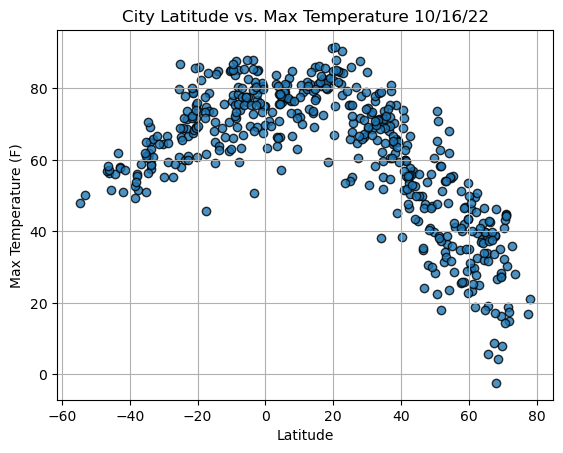

In [54]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig1.png")

# Show plot.
plt.show()

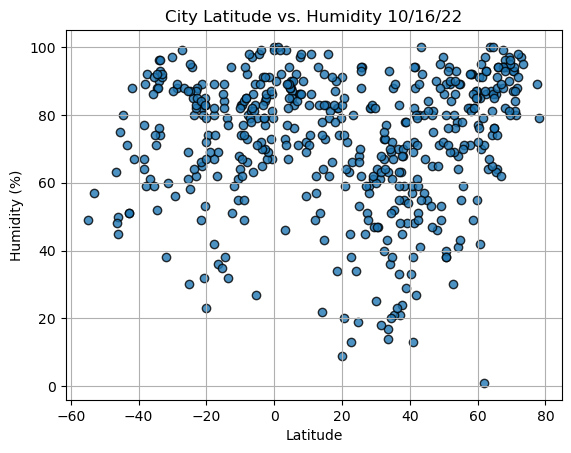

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig2.png")
# Show plot.
plt.show()

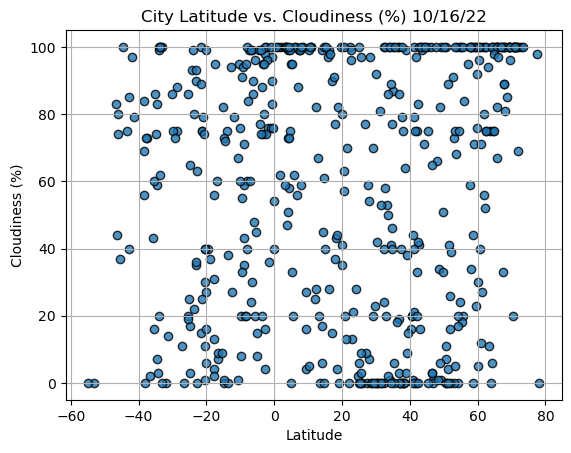

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig3.png")
# Show plot.
plt.show()

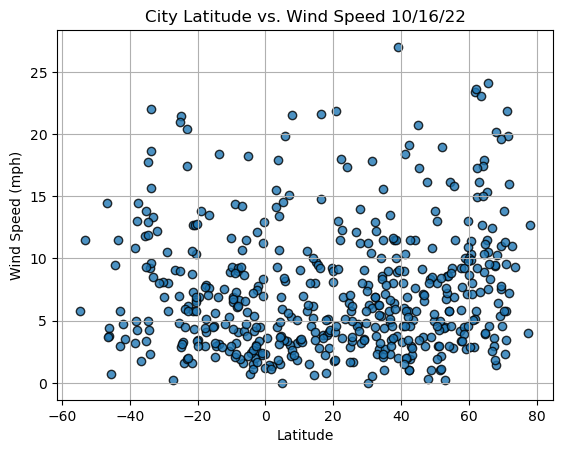

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [60]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [61]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

print(line_eq)
print(f'The p-value is : {p_value:.3f}')

y = -0.45x + 92.94
The p-value is : 0.011


In [62]:
# Calculate the regression line 'y values' from the slope and intercept
regress_values = [(lat * slope + intercept) for lat in lats]

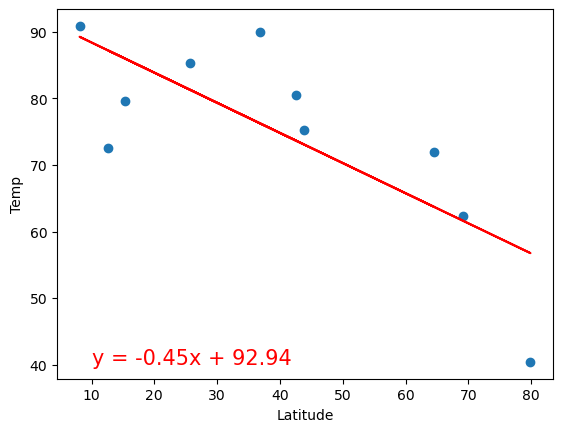

In [63]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [66]:
# Retrieve only northern hemisphere cities
city_data_df.loc[(city_data_df["Lat"] >= 0)]

#Show first five rows
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Okha,RU,2022-10-16 23:49:48,53.5739,142.9478,36.59,93,68,8.59
1,Prince Rupert,CA,2022-10-16 23:45:57,54.3161,-130.3201,68.09,68,0,5.75
2,Pacific Grove,US,2022-10-16 23:48:27,36.6177,-121.9166,68.02,70,100,5.75
3,Leningradskiy,RU,2022-10-16 23:46:07,69.3833,178.4167,16.25,90,100,7.58
5,Sao Filipe,CV,2022-10-16 23:49:49,14.8961,-24.4956,77.34,73,40,9.73


In [68]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

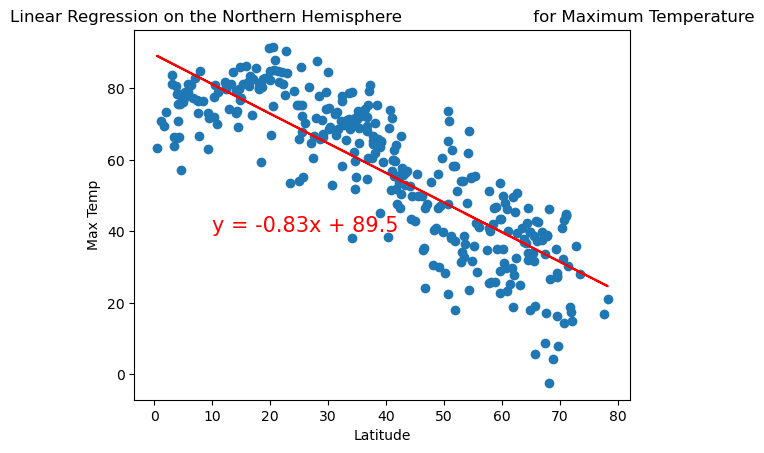

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

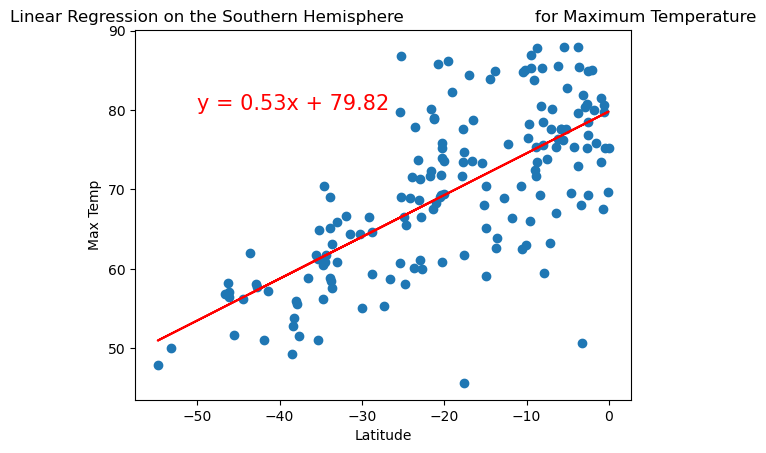

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

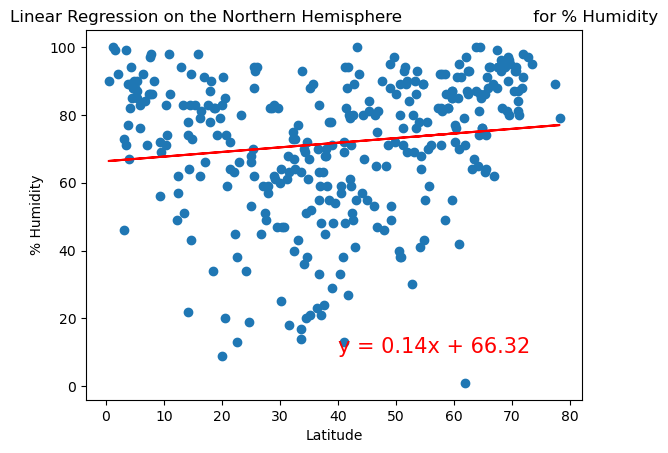

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

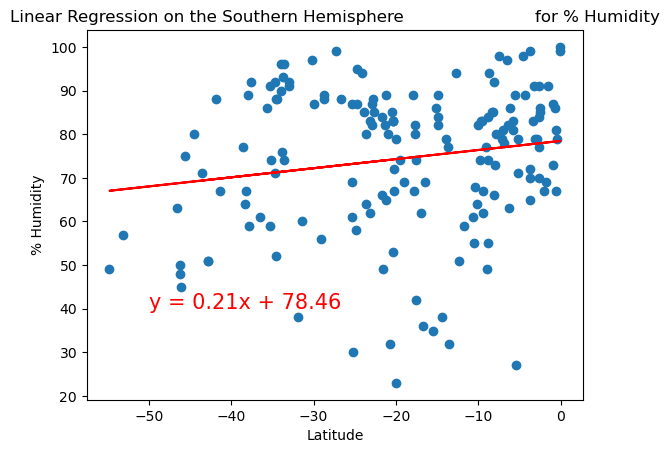

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,40))

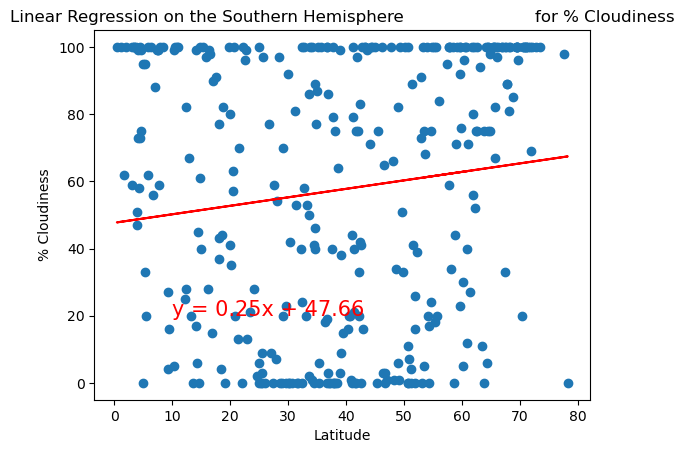

In [82]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10, 20))

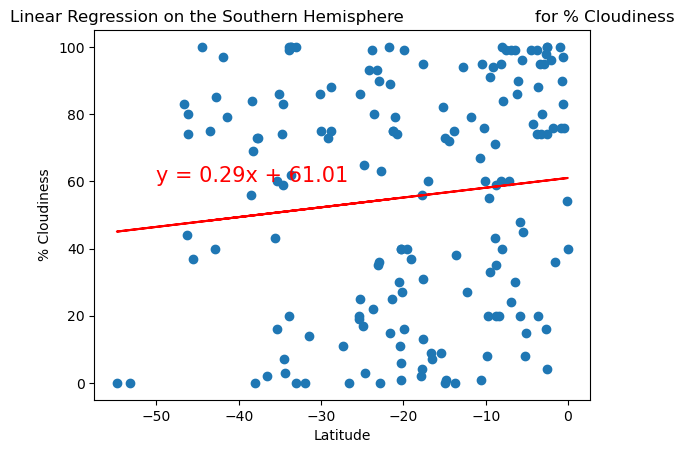

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

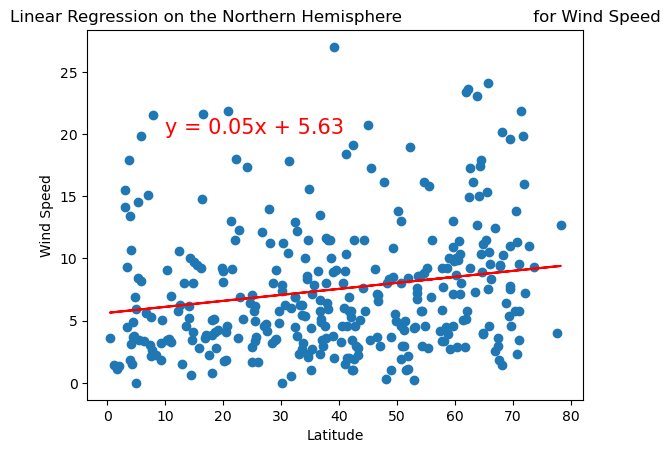

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10, 20))

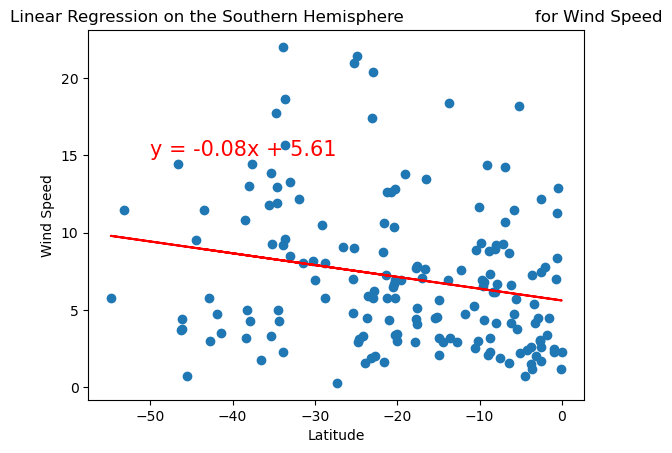

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

In [85]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (\\wsl.localhost\Ubuntu\home\jenny\git\World_Weather_Analysis\weather_data\config.py)